In [1]:
import tensorflow as tf
import sys
import tensorflow_hub as tfhb

print(tf.__version__)
print(sys.version)
print(tf.config.list_physical_devices("GPU"))

2.10.0
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_data_dir = r"C:\Users\pc\Downloads\10_food_classes_10_percent (1)\10_food_classes_10_percent\train"
test_data_dir  = r"C:\Users\pc\Downloads\10_food_classes_10_percent (1)\10_food_classes_10_percent\test"

# Saving Base-Line Models Links

In [4]:
efficient_net_b0 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficient_net_b7 = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"
resnet_v1_101 = "https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
resnet_v2_152 = "https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"

In [ ]:
efficient_net_b0_classificaton_link = ""

# Loading Data into Tensors and Batches(Without Data Augmentation)

In [5]:
class_labels = ["ice_cream","pizza","sushi","fried_rice","chicken_curry","steak","grilled_salmon","ramen","hamburger","chicken_wings"]

In [6]:
train_ds_mn, valid_ds_mn = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                       labels="inferred",
                                                                       label_mode="categorical",
                                                                       class_names=class_labels,
                                                                       shuffle=True,
                                                                       validation_split=0.1,
                                                                       seed=42,
                                                                       subset="both",
                                                                       image_size=(224,224),
                                                                       batch_size=32)

test_ds_mn = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         labels="inferred",
                                                         label_mode="categorical",
                                                         class_names=class_labels,
                                                         shuffle=True,
                                                         image_size=(224,224),
                                                         batch_size=32)

Found 750 files belonging to 10 classes.
Using 675 files for training.
Using 75 files for validation.
Found 2500 files belonging to 10 classes.


# Creating Helper Function for Plotting Loss and Accuracy Curves

In [20]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    #Creating History Variables
    train_loss = history.history["loss"]
    valid_loss = history.history["val_loss"]
    train_accuracy = history.history["accuracy"]
    valid_accuracy = history.history["val_accuracy"]
    
    #Creating Loss Curve
    plt.figure()
    plt.plot(train_loss,label="Training Loss")
    plt.plot(valid_loss,label="Validation Loss")
    plt.legend()
    plt.title("Loss Curve")
    
    #Creating Accuracy Curve
    plt.figure()
    plt.plot(train_accuracy,label="Training Accuracy")
    plt.plot(valid_accuracy,label="Validation_Accuracy")
    plt.legend()
    plt.title("Accuracy Curve")

# Creating and Fitting on Efficient Bet B0 Base Model

In [16]:
base_model_b0 = tfhb.KerasLayer(efficient_net_b0,
                                trainable=False)

In [17]:
efficient_net_b0_model = tf.keras.Sequential([
                                              tf.keras.layers.Rescaling(1.0/255.0),                  
                                              base_model_b0,
                                              tf.keras.layers.Dense(10,activation="softmax")])

efficient_net_b0_model.compile(loss="categorical_crossentropy",
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["accuracy"])

In [18]:
history_efficient_net_b0 = efficient_net_b0_model.fit(train_ds_mn,
                           epochs=10,
                           steps_per_epoch=len(train_ds_mn),
                           validation_data=valid_ds_mn,
                           validation_steps=len(valid_ds_mn))

Epoch 1/10
22/22 [==============================] - 9s 99ms/step - loss: 1.9003 - accuracy: 0.4237 - val_loss: 1.5723 - val_accuracy: 0.5867
Epoch 2/10
22/22 [==============================] - 1s 59ms/step - loss: 1.1029 - accuracy: 0.7719 - val_loss: 1.1519 - val_accuracy: 0.6933
Epoch 3/10
22/22 [==============================] - 1s 59ms/step - loss: 0.7829 - accuracy: 0.8252 - val_loss: 0.9890 - val_accuracy: 0.7333
Epoch 4/10
22/22 [==============================] - 1s 59ms/step - loss: 0.6271 - accuracy: 0.8652 - val_loss: 0.8928 - val_accuracy: 0.7600
Epoch 5/10
22/22 [==============================] - 1s 59ms/step - loss: 0.5311 - accuracy: 0.8844 - val_loss: 0.8330 - val_accuracy: 0.7600
Epoch 6/10
22/22 [==============================] - 1s 59ms/step - loss: 0.4616 - accuracy: 0.9022 - val_loss: 0.7871 - val_accuracy: 0.7867
Epoch 7/10
22/22 [==============================] - 1s 59ms/step - loss: 0.4068 - accuracy: 0.9170 - val_loss: 0.7676 - val_accuracy: 0.7600
Epoch 8/10
22

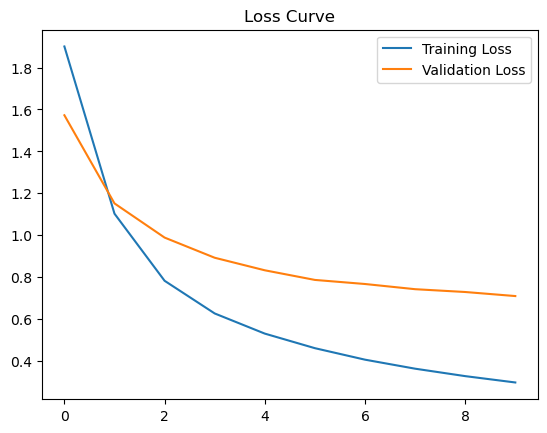

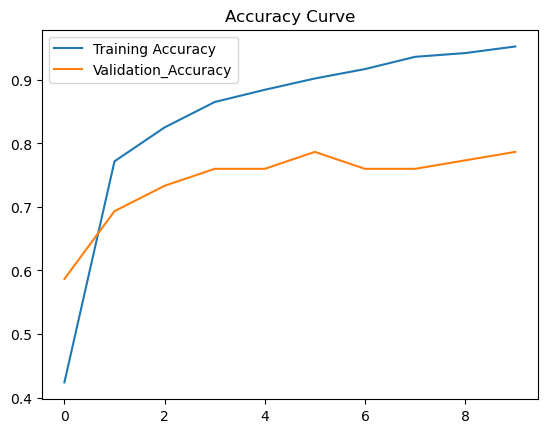

In [21]:
plot_loss_accuracy(history_efficient_net_b0)

In [27]:
efficient_net_b0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [29]:
for layer_number, layer in enumerate(base_model_b0.layers):
  print(layer_number, layer.name)

AttributeError: 'KerasLayer' object has no attribute 'layers'

In [30]:
type(base_model_b0)

tensorflow_hub.keras_layer.KerasLayer

In [34]:
base_model_b0.__dir__

<function KerasLayer.__dir__()>

In [43]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

In [44]:
outputs = base_model_b0(inputs)

In [49]:
print("Thickness of the model:", len(base_model_b0.weights))
print ("{:<80} {:<20} {:<10}".format('Layer','Shape','Type'))

for i in range(len(base_model_b0.weights)):
    model_weights_raw_string = str(base_model_b0.weights[i])
    model_weights_wo_weights = model_weights_raw_string.split(", numpy", 1)[0]
    dtype = model_weights_wo_weights.split(" dtype=")[1]
    shape = model_weights_wo_weights.split(" shape=")[1].split(" dtype=")[0]
    
    print ("{:<80} {:<20} {:<10}".format(base_model_b0.weights[i].name, shape, dtype))

Thickness of the model: 309
Layer                                                                            Shape                Type      
stem_conv2d/kernel:0                                                             (3, 3, 3, 32)        float32   
stem_bn/gamma:0                                                                  (32,)                float32   
stem_bn/beta:0                                                                   (32,)                float32   
stack_0/block_0/depthwise_conv2d/depthwise_kernel:0                              (3, 3, 32, 1)        float32   
stack_0/block_0/depthwise_bn/gamma:0                                             (32,)                float32   
stack_0/block_0/depthwise_bn/beta:0                                              (32,)                float32   
stack_0/block_0/se_reduce_conv2d/kernel:0                                        (1, 1, 32, 8)        float32   
stack_0/block_0/se_reduce_conv2d/bias:0                             

stack_3/block_2/se_reduce_conv2d/bias:0                                          (20,)                float32   
stack_3/block_2/se_expand_conv2d/kernel:0                                        (1, 1, 20, 480)      float32   
stack_3/block_2/se_expand_conv2d/bias:0                                          (480,)               float32   
stack_3/block_2/project_conv2d/kernel:0                                          (1, 1, 480, 80)      float32   
stack_3/block_2/project_bn/gamma:0                                               (80,)                float32   
stack_3/block_2/project_bn/beta:0                                                (80,)                float32   
stack_4/block_0/expand_conv2d/kernel:0                                           (1, 1, 80, 480)      float32   
stack_4/block_0/expand_bn/gamma:0                                                (480,)               float32   
stack_4/block_0/expand_bn/beta:0                                                 (480,)         

top_conv2d/kernel:0                                                              (1, 1, 320, 1280)    float32   
top_bn/gamma:0                                                                   (1280,)              float32   
top_bn/beta:0                                                                    (1280,)              float32   
stem_bn/moving_mean:0                                                            (32,)                float32   
stem_bn/moving_variance:0                                                        (32,)                float32   
stack_0/block_0/depthwise_bn/moving_mean:0                                       (32,)                float32   
stack_0/block_0/depthwise_bn/moving_variance:0                                   (32,)                float32   
stack_0/block_0/project_bn/moving_mean:0                                         (16,)                float32   
stack_0/block_0/project_bn/moving_variance:0                                     (16,)          

# Creating and Fitting Efficient Net B7 Model

In [23]:
base_model_b7 = tfhb.KerasLayer(efficient_net_b7,
                                trainable=False)

efficient_net_b7_model = tf.keras.Sequential([tf.keras.layers.Rescaling(1.0/255.0),
                                              base_model_b7,
                                              tf.keras.layers.Dense(10,activation="softmax")])


In [24]:
efficient_net_b7_model.compile(loss="categorical_crossentropy",
                               optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])

In [25]:
history_efficient_net_b7 = efficient_net_b7_model.fit(train_ds_mn,
                                                      epochs=10,
                                                      steps_per_epoch=len(train_ds_mn),
                                                      validation_data=valid_ds_mn,
                                                      validation_steps=len(valid_ds_mn)
                                                      )

Epoch 1/10
22/22 [==============================] - 34s 480ms/step - loss: 1.6611 - accuracy: 0.5215 - val_loss: 1.1525 - val_accuracy: 0.6400
Epoch 2/10
22/22 [==============================] - 6s 273ms/step - loss: 0.8243 - accuracy: 0.8267 - val_loss: 0.9118 - val_accuracy: 0.7067
Epoch 3/10
22/22 [==============================] - 6s 273ms/step - loss: 0.6002 - accuracy: 0.8533 - val_loss: 0.8204 - val_accuracy: 0.7333
Epoch 4/10
22/22 [==============================] - 6s 274ms/step - loss: 0.4872 - accuracy: 0.8993 - val_loss: 0.7923 - val_accuracy: 0.7467
Epoch 5/10
22/22 [==============================] - 6s 274ms/step - loss: 0.4172 - accuracy: 0.9230 - val_loss: 0.7761 - val_accuracy: 0.7600
Epoch 6/10
22/22 [==============================] - 6s 273ms/step - loss: 0.3645 - accuracy: 0.9200 - val_loss: 0.7627 - val_accuracy: 0.7733
Epoch 7/10
22/22 [==============================] - 6s 274ms/step - loss: 0.3276 - accuracy: 0.9259 - val_loss: 0.7534 - val_accuracy: 0.7733
Epoch

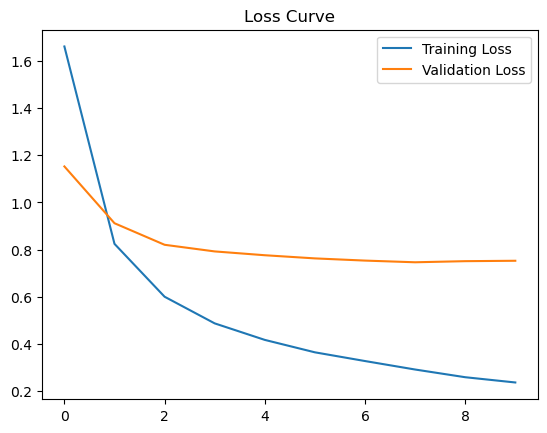

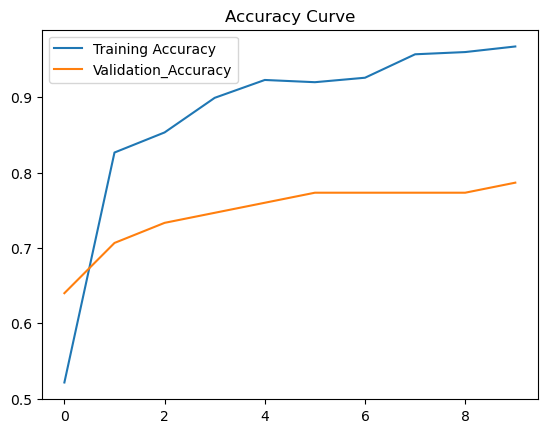

In [26]:
plot_loss_accuracy(history_efficient_net_b7)

In [ ]:
#